## Exploring Data




### Connect to GeoDB

In [10]:
from xcube_geodb.core.geodb import GeoDBClient

In [11]:
geodb = GeoDBClient()

### List Datasets

__Step 1__: List my datasets.

In [12]:
geodb.whoami

'anja'

### Get the whole Collection

In [22]:
%time gdf = geodb.get_collection('land_use_slo', 'limit=100000')
#gdf

CPU times: user 48 s, sys: 1.13 s, total: 49.1 s
Wall time: 55.9 s


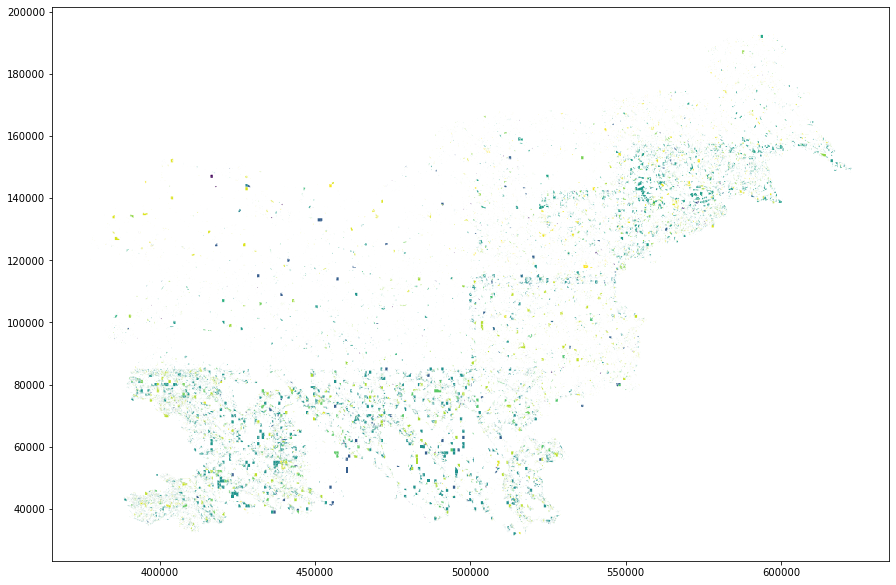

In [20]:
gdf.plot(column="raba_pid", figsize=(15,15))

### Use Postgrest Syntax

In [12]:
gdfsub = geodb.get_collection('lpis_slo', query='limit=50000')
gdfsub

,id,gerk_pid,area,raba_id,d_update,geometry
0,42333,1316882,3875.9122,1300,2016-03-31,"POLYGON ((503276.332 82332.221, 503280.971 823..."
1,42334,1317096,9727.8836,1300,2016-03-31,"POLYGON ((502671.229 82520.532, 502671.465 825..."
2,42335,3031389,20782.4635,1100,2016-03-31,"POLYGON ((578621.254 161113.648, 578613.780 16..."
3,42336,2472367,10200.1857,1100,2016-03-31,"POLYGON ((577051.608 158946.137, 577028.303 15..."
4,42337,180432,879.1847,1100,2016-03-31,"POLYGON ((578705.960 186321.601, 578705.301 18..."
...,...,...,...,...,...,...
49995,92309,3721991,426.4414,1100,2016-03-31,"POLYGON ((524970.102 102297.795, 524991.245 10..."
49996,92310,3722140,2489.4891,1300,2016-03-31,"POLYGON ((524778.818 102189.140, 524830.260 10..."
49997,92311,1073281,4151.7025,1300,2016-03-31,"POLYGON ((524775.394 102217.066, 524782.134 10..."
49998,92312,5552840,1004.8390,1300,2016-03-31,"POLYGON ((507456.564 160529.453, 507490.521 16..."


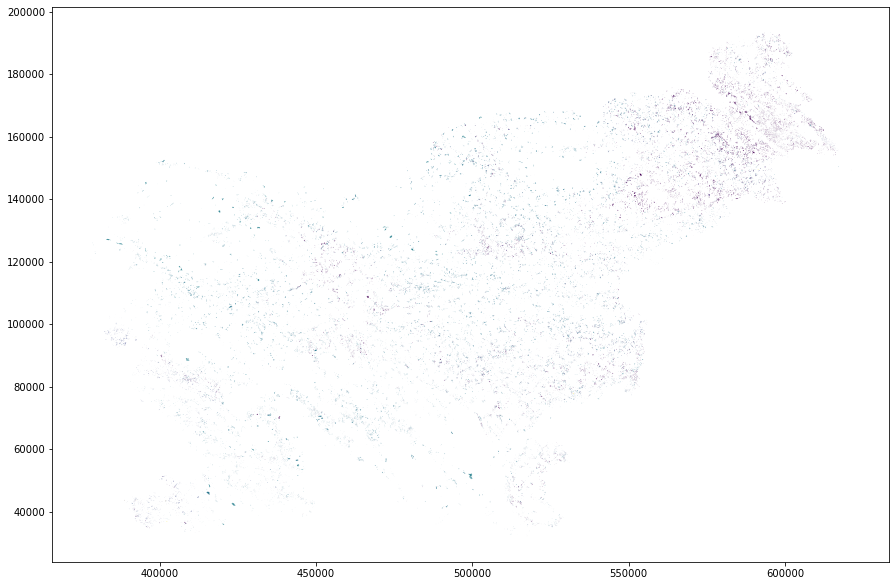

In [13]:
gdfsub.plot(column="raba_id", figsize=(15,15))

### Get a Collection using a Bounding Box

In [ ]:
gdf = geodb.get_collection_by_bbox(collection="lpis_slo", bbox=(452750.0, 464000.0, 88909.549, 102486.299),
                           comparison_mode="contains", bbox_crs=3794, limit=200, offset=10)
gdf

In [ ]:
gdf.plot(column="raba_pid", figsize=(15,15))

### Get Collection using PostGreSQL Syntax

In [16]:
gdf = geodb.get_collection_pg(collection='land_use', where='raba_id=1410')
gdf.head()

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2020-01-31T11:08:35.241344+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,62,2020-01-31T11:08:35.241344+00:00,None,"POLYGON ((457261.001 96349.254, 457256.831 963...",3596498,1410,2019-01-05
2,22,2020-01-31T11:08:35.241344+00:00,None,"POLYGON ((455384.809 97907.054, 455380.659 979...",3616776,1410,2019-02-25
3,28,2020-01-31T11:08:35.241344+00:00,None,"POLYGON ((462585.734 93088.987, 462567.020 930...",3826126,1410,2019-01-23
4,32,2020-01-31T11:08:35.241344+00:00,None,"POLYGON ((457748.827 96167.354, 457748.394 961...",2309744,1410,2019-01-05


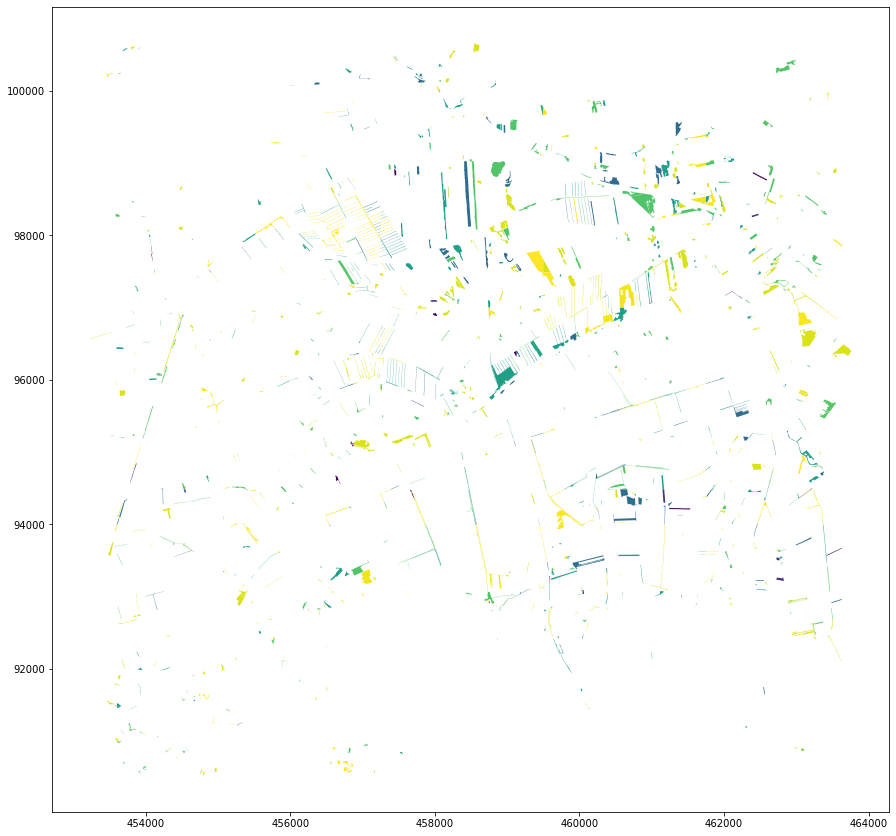

In [17]:
gdf.plot(column="raba_pid", figsize=(15,15))

### Query the collection using the PostGreSQL Syntax for Advanced Aggregation

In [18]:
df = geodb.get_collection_pg('land_use', where='raba_id=1410', group='d_od', select='COUNT(d_od) as ct, d_od')
df.head()

,ct,d_od
0,12,2019-03-21
1,47,2019-02-25
2,17,2019-03-13
3,26,2019-02-20
4,2,2019-04-29
